<a href="https://colab.research.google.com/github/nikozhuk/nanoGPT_tiny_pushkin/blob/main/classification_base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Base model. Pets face challenge emotion classification.**

---



In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
import os

happy_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/classification_base_model/train/happy')
angry_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/classification_base_model/train/Angry')
sad_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/classification_base_model/train/Sad')
other_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/classification_base_model/train/Other')

print('total training happy faces images:', len(os.listdir(happy_dir)))
print('total training angry faces images:', len(os.listdir(angry_dir)))
print('total training sad faces images:', len(os.listdir(sad_dir)))
print('total training other faces images:', len(os.listdir(other_dir)))

happy_files = os.listdir(happy_dir)
print(happy_files[:10])

angry_files = os.listdir(angry_dir)
print(angry_files[:10])

sad_files = os.listdir(sad_dir)
print(sad_files[:10])

other_files = os.listdir(other_dir)
print(other_files[:10])


total training happy faces images: 250
total training angry faces images: 250
total training sad faces images: 250
total training other faces images: 250
['aug-106-022.jpg', '036.jpg', 'aug-44-056.jpg', 'aug-142-066.jpg', 'aug-125-044.jpg', '057.jpg', 'aug-47-060.jpg', '108.jpg', 'aug-155-079.jpg', '039.jpg']
['70.jpg', 'aug-134-77.jpg', '60.jpg', 'aug-95-27.jpg', 'aug-87-19.jpg', 'aug-116-54.jpg', 'aug-53-70.jpg', 'aug-168-25.jpg', '83.jpg', 'aug-55-72.jpg']
['093.jpg', '098.jpg', 'aug-134-066.jpg', 'aug-96-013.jpg', 'aug-124-055.jpg', 'aug-39-054.jpg', 'aug-148-083.jpg', 'aug-6-007.jpg', '019.jpg', 'aug-119-050.jpg']
['aug-148-12.jpg', 'aug-46-59.jpg', 'aug-152-19.jpg', 'aug-67-30.jpg', '34.jpg', 'aug-80-43.jpg', 'aug-3-05.jpg', '48.jpg', 'aug-52-08.jpg', 'aug-182-54.jpg']


/content/drive/MyDrive/Colab Notebooks/classification_base_model/train/happy/aug-106-022.jpg


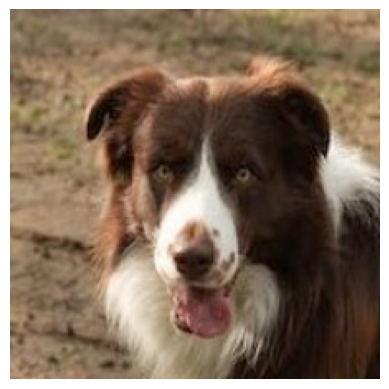

/content/drive/MyDrive/Colab Notebooks/classification_base_model/train/happy/036.jpg


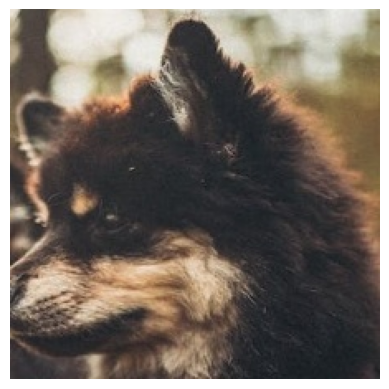

/content/drive/MyDrive/Colab Notebooks/classification_base_model/train/Angry/70.jpg


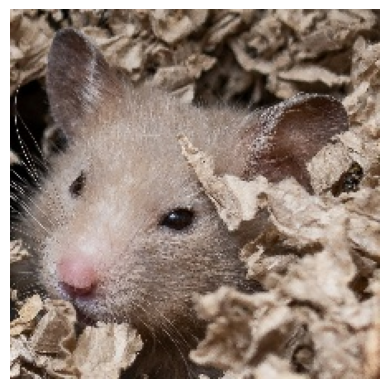

/content/drive/MyDrive/Colab Notebooks/classification_base_model/train/Angry/aug-134-77.jpg


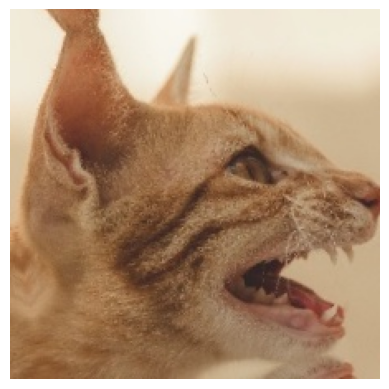

/content/drive/MyDrive/Colab Notebooks/classification_base_model/train/Sad/093.jpg


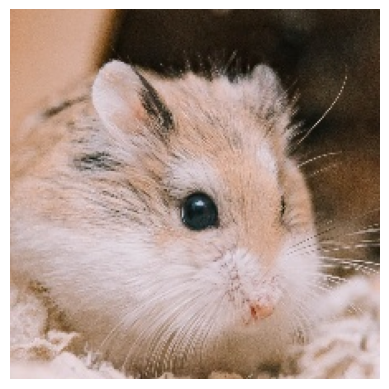

/content/drive/MyDrive/Colab Notebooks/classification_base_model/train/Sad/098.jpg


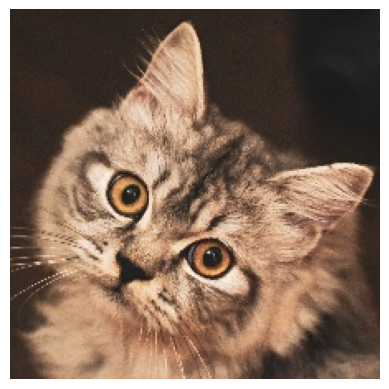

/content/drive/MyDrive/Colab Notebooks/classification_base_model/train/happy/aug-106-022.jpg


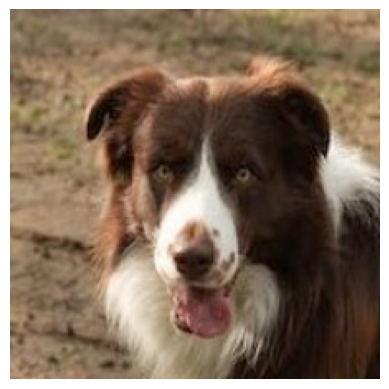

/content/drive/MyDrive/Colab Notebooks/classification_base_model/train/happy/036.jpg


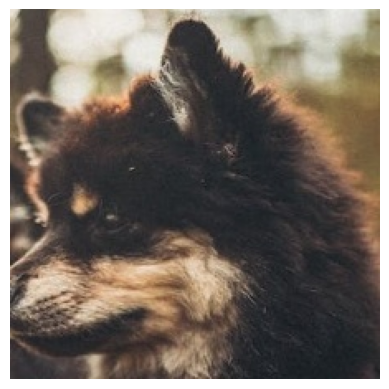

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_happy = [os.path.join(happy_dir, fname)
                for fname in happy_files[pic_index-2:pic_index]]
next_angry = [os.path.join(angry_dir, fname)
                for fname in angry_files[pic_index-2:pic_index]]
next_sad = [os.path.join(sad_dir, fname)
                for fname in sad_files[pic_index-2:pic_index]]
next_other = [os.path.join(other_dir, fname)
                for fname in other_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_happy+next_angry+next_sad+next_happy):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
! pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/Colab Notebooks/classification_base_model/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Colab Notebooks/classification_base_model/valid"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # The input shape is the desired size of the image 224x224 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("faces_base.h5")

Found 1000 images belonging to 4 classes.
Found 36 images belonging to 4 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 64)        18496     
                                      

KeyboardInterrupt: 

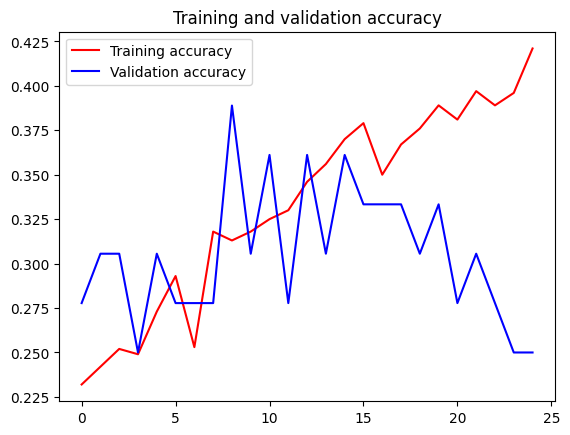

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 060.jpg to 060.jpg


NameError: name 'model' is not defined